# 4. Korpusverarbeitung mit Python und NLTK

- Verarbeiten von Korpusdateien mit Python (`open()`, `split()`, `glob()`) 
- Frequenzliste mit Python
- Formate verschiedener Korpustypen (z.B. POS-annotierte Korpora als Wort-POS-Tuppellisten)

- NLTK Korpusreader: z.B. `nltk.PlaintextCorpusReader()`
- NLTK Korpusmethoden: `nltk.words()`, `nltk.Text()`
- NLTK Ressourcen: Korpora, Stopwortlisten
- NLTK Frequenzlisten: `nltk.FreqDist()`, `nltk.ConditionalFreqDist()`
- NLTK Konkordanzen: `nltk.concordance()`
- NLTK Kollokationen: `nltk.collocations()`



- Literatur: Kapitel 1-3 in https://www.nltk.org/book

## 1. Korpusverarbeitung mit Python



### open / read

- Öffnen und Einlesen von Korpus-Textdateien
- `with open` erübrigt schließen des Dateihandles 

In [1]:
with open('sample_texts/sample_text.txt') as f:
    sample_text=f.read()
print(sample_text)

Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.


### split / re.split / re.findall

- Zur Tokenisierung wird der Text in Wörter und ggf auch Satzzeichen (punctuation) gesplittet.

In [2]:
sample_text_tokens = sample_text.split()
print(sample_text_tokens)

['Call', 'me', 'Ishmael.', 'Some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse,', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore,', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world.']


In [3]:
import re
sample_text_tokens = list(filter(None, re.split('[^\w+]',sample_text)))
print(sample_text_tokens)

['Call', 'me', 'Ishmael', 'Some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world']


In [4]:
sample_text_tokens = re.findall('[\w]+',sample_text)
print(sample_text_tokens)

['Call', 'me', 'Ishmael', 'Some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world']


In [5]:
sample_text_tokens = re.findall('\w+|[^\w\s]+',sample_text) ##entspricht nltk.wordpunct_tokenize
print(sample_text_tokens)

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', '—', 'never', 'mind', 'how', 'long', 'precisely', '—', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.']


### zip

- zip aggregiert iterierbare Elemente in Tupel
- Verwendung zur Generierung von N-grammen


In [6]:
tokens = sample_text_tokens[:7]
tokens

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago']

In [7]:
result = zip(tokens, tokens)
print(list(result))

[('Call', 'Call'), ('me', 'me'), ('Ishmael', 'Ishmael'), ('.', '.'), ('Some', 'Some'), ('years', 'years'), ('ago', 'ago')]


In [8]:
result = zip(tokens, tokens[1:], tokens[2:])
print(list(result))

[('Call', 'me', 'Ishmael'), ('me', 'Ishmael', '.'), ('Ishmael', '.', 'Some'), ('.', 'Some', 'years'), ('Some', 'years', 'ago')]


### glob

- ermöglicht ähnlich wie Globs auf der bash das Iterieren über Verzeichnisse, etwa zum Einlesen der Dateien in einem Korpus-Verzeichnis

In [9]:
import glob
print(glob.glob('sample_texts/*.txt'))

['sample_texts/sample_text.txt', 'sample_texts/sample_text2.txt']


In [10]:
corpus = []

for filename in glob.glob('sample_texts/*.txt'):
    f=open(filename,'r',encoding='utf8')
    text=f.read()
    f.close()
    tokens = re.split('[^\w+]',text)
    #corpus.extend(tokens)
    corpus.append(tokens) #list of wordlists per document

print(corpus)

[['Call', 'me', 'Ishmael', '', 'Some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', '', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', '', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', ''], ['There', 'now', 'is', 'your', 'insular', 'city', 'of', 'the', 'Manhattoes', '', 'belted', 'round', 'by', 'wharves', 'as', 'Indian', 'isles', 'by', 'coral', 'reefs', 'commerce', 'surrounds', 'it', 'with', 'her', 'surf', '', 'Right', 'and', 'left', '', 'the', 'streets', 'take', 'you', 'waterward', '', 'Its', 'extreme', 'downtown', 'is', 'the', 'battery', '', 'where', 'that', 'noble', 'mole', 'is', 'washed', 'by', 'waves', '', 'and', 'cooled', 'by', 'breezes', '', 'which', 'a', 'few', 'hours', 'previous', 'were', 'out', 'of', 'sight', 'of', 'land', '', 'Look', 'at', 'the', 'crowds', 'of', 'water', 'gazers', 'there', '']]


In [11]:
len(corpus)

2

### Erzeugung einer Korpus-Wortliste aus der Liste von Dokumenten-Wortlisten (*flatten list*)

In [12]:
corpus_words = [word for document in corpus for word in document]
print(corpus_words)

['Call', 'me', 'Ishmael', '', 'Some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', '', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', '', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '', 'There', 'now', 'is', 'your', 'insular', 'city', 'of', 'the', 'Manhattoes', '', 'belted', 'round', 'by', 'wharves', 'as', 'Indian', 'isles', 'by', 'coral', 'reefs', 'commerce', 'surrounds', 'it', 'with', 'her', 'surf', '', 'Right', 'and', 'left', '', 'the', 'streets', 'take', 'you', 'waterward', '', 'Its', 'extreme', 'downtown', 'is', 'the', 'battery', '', 'where', 'that', 'noble', 'mole', 'is', 'washed', 'by', 'waves', '', 'and', 'cooled', 'by', 'breezes', '', 'which', 'a', 'few', 'hours', 'previous', 'were', 'out', 'of', 'sight', 'of', 'land', '', 'Look', 'at', 'the', 'crowds', 'of', 'water', 'gazers', 'there', '']


In [13]:
len(corpus_words)

126

### Erzeugung einer Frequenzliste in Python


- Frequenzlisten werden in Python üblicherweise als Dictionaries repräsentiert
- Verschiedene Varianten zur Berechnung mit Python sind möglich (z.B. mit `if-else`, `try-except`, `dictionary comprehension`)
- in den Übungsaufgaben werden weitere Varianten verwendet und deren Performance über Efficiency Tests verglichen

In [14]:
counts = {}
for t in corpus_words:
    if t not in counts: counts[t] = 1
    else: counts[t] += 1

print(counts)

{'Call': 1, 'me': 2, 'Ishmael': 1, '': 13, 'Some': 1, 'years': 1, 'ago': 1, 'never': 1, 'mind': 1, 'how': 1, 'long': 1, 'precisely': 1, 'having': 1, 'little': 2, 'or': 1, 'no': 1, 'money': 1, 'in': 1, 'my': 1, 'purse': 1, 'and': 4, 'nothing': 1, 'particular': 1, 'to': 1, 'interest': 1, 'on': 1, 'shore': 1, 'I': 2, 'thought': 1, 'would': 1, 'sail': 1, 'about': 1, 'a': 2, 'see': 1, 'the': 6, 'watery': 1, 'part': 1, 'of': 5, 'world': 1, 'There': 1, 'now': 1, 'is': 3, 'your': 1, 'insular': 1, 'city': 1, 'Manhattoes': 1, 'belted': 1, 'round': 1, 'by': 4, 'wharves': 1, 'as': 1, 'Indian': 1, 'isles': 1, 'coral': 1, 'reefs': 1, 'commerce': 1, 'surrounds': 1, 'it': 1, 'with': 1, 'her': 1, 'surf': 1, 'Right': 1, 'left': 1, 'streets': 1, 'take': 1, 'you': 1, 'waterward': 1, 'Its': 1, 'extreme': 1, 'downtown': 1, 'battery': 1, 'where': 1, 'that': 1, 'noble': 1, 'mole': 1, 'washed': 1, 'waves': 1, 'cooled': 1, 'breezes': 1, 'which': 1, 'few': 1, 'hours': 1, 'previous': 1, 'were': 1, 'out': 1, 'sigh

---
## 2. NLTK Grundlagen Korpusverabreitung

- die NLTK Library (*Natural Language Toolkit*) ist eine open source Plattform zur Verarbeitung von Sprachdaten
- zum Funktionsumfang gehören: Tokenisierung, Stemming, Tagging, Parsing, Semantic reasoning, Klassifikation
- sie bietet auch Zugriff auf eine Vielzahl an Ressourcen an, insbesondere verschiedene Korpora

- NLTK wurde ursprünglich als Tool für den CL-Unterricht entwickelt
- es gibt einen *hands-on guide (NLTK book)*: https://www.nltk.org/book/



In [15]:
import nltk

###  nltk.word_tokenize

- der Default-NLTK-Tokenizer ist `word_tokenize`
- primär für Englisch (Abkürzungen etc.)
- daneben gibt es weitere Tokenizer:
    - `wordpunct_tokenize()`, entspricht `re.findall(r'\w+|[^\w\s]+', text)`
    - `regexp_tokenize()`, erlaubt die Definition eigener Tokenizer

In [16]:
sample_text_tokens = nltk.word_tokenize(sample_text)
print(sample_text_tokens)

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.']


### nltk.sent_tokenize

- führt eine Satzsegmentierung aus

In [17]:
sample_text_sents = nltk.sent_tokenize(sample_text)
print(sample_text_sents)

['Call me Ishmael.', 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.']


In [18]:
sample_text_sents_tokens = [nltk.word_tokenize(sent) for sent in sample_text_sents] 
print(sample_text_sents_tokens)

[['Call', 'me', 'Ishmael', '.'], ['Some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.']]


---
### NLTK-Korpusreader

- NLTK bietet verschiedene Korpus-Reader an, die Korpora direkt in die entsprechende Korpusformate/objekte einlesen: https://www.nltk.org/howto/corpus.html#corpus-readers


### Auflistung von Korpusreader-Methoden und deren Output-Typen:

- words(): list of str
- sents(): list of (list of str)
- paras(): list of (list of (list of str))
- tagged_words(): list of (str,str) tuple
- tagged_sents(): list of (list of (str,str))
- tagged_paras(): list of (list of (list of (str,str)))
- chunked_sents(): list of (Tree w/ (str,str) leaves)
- parsed_sents(): list of (Tree with str leaves)
- parsed_paras(): list of (list of (Tree with str leaves))
- xml(): A single xml ElementTree
- raw(): unprocessed corpus contents

https://github.com/nltk/nltk/blob/develop/nltk/corpus/reader/__init__.py#L32


### nltk.PlaintextCorpusReader


- im einfachsten Fall liegen Korpora als Menge unannotierter Texte vorPlaintextCorpusReader 
- PlaintextCorpusReader ermöglicht das Einlesen eines reinen Text-Korpus aus einem Verzeichnis
- Ergebnis ist ein entsprechendes Korpus-Objekt, für das verschiedene Methoden zur Verfügung stehen
- insbesondere etwa die `words()`-Methode, die das Korpus als **Token-Liste** repräsentiert ausgibt

In [19]:
from nltk.corpus import PlaintextCorpusReader

# RegEx or list of file names
files = ".*\.txt"
my_corpus = PlaintextCorpusReader("sample_texts", files)
type(my_corpus)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

### nltk.words
- mit der `nltk.words()`-Methoden wird das gesamte Korpus als Wortliste ausgegeben
- eine Einschränkung auf bestimmte Dokumente ist über die Angabe als optionaler Parameter möglich

In [20]:
my_corpus.words()

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', ...]

In [21]:
my_corpus.words('sample_text2.txt')

['There', 'now', 'is', 'your', 'insular', 'city', 'of', ...]

### nltk.sents

- gibt satzsegmentierte Tokenlisten aus (sent_tokenize + word_tokenize)

In [22]:
my_corpus.sents()

[['Call', 'me', 'Ishmael', '.'], ['Some', 'years', 'ago', '—', 'never', 'mind', 'how', 'long', 'precisely', '—', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.'], ...]

### nltk.Text

- ist ein Wrapper um Token-Sequenzen: https://www.nltk.org/api/nltk.text.html#nltk.text.Text
- erlaubt die Anwendung grundlegender Korpusmethoden zur initialen Textexploration (über die interaktive Konsole)

In [23]:
my_corpus_text = nltk.Text(my_corpus.words())
my_corpus_text

<Text: Call me Ishmael . Some years ago —...>

In [24]:
my_corpus_text[0:9]

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', '—', 'never']

In [25]:
type(my_corpus_text)

nltk.text.Text

### nltk.Text.count

- zählt, wie oft ein Wort im Text vorkommt

In [26]:
my_corpus_text.count('is')

3

### nltk.Text.index

- sucht den Index des ersten Vorkommens des Worts im Text

In [27]:
my_corpus_text.index('is')

51

### nltk.Text.concordance
- gibt eine Konkordanz (KWIC=Keyword in Context) für ein Wort mit dem angegebenen Kontextfenster aus
- Wortabgleich ist nicht case-sensitiv

In [28]:
my_corpus_text.concordance('is')

Displaying 3 of 3 matches:
 watery part of the world . There now is your insular city of the Manhattoes ,
 you waterward . Its extreme downtown is the battery , where that noble mole i
s the battery , where that noble mole is washed by waves , and cooled by breez


### nltk.Text.findall

- findet Instanzen des regulären Ausdrucks im Text
- das RegExp-Muster, um eine einzelnes Token zu finden, muss in spitze Klammern eingeschlossen werden

In [29]:
my_corpus_text.findall('<[Tt]here><.*><is>')

There now is


### nltk.Text.vocab

- gibt die Häufigkeitsverteilung der Token im Korpus zurück

In [30]:
vocabulary = my_corpus_text.vocab()
dict(list(vocabulary.items())[0:10])

{'Call': 1,
 'me': 2,
 'Ishmael': 1,
 '.': 6,
 'Some': 1,
 'years': 1,
 'ago': 1,
 '—': 3,
 'never': 1,
 'mind': 1}

In [31]:
type(vocabulary) #entspricht FreqDist auf Tokens, s.u.

nltk.probability.FreqDist

In [32]:
from nltk import FreqDist
dict(list(FreqDist(my_corpus.words()).items())[0:10])

{'Call': 1,
 'me': 2,
 'Ishmael': 1,
 '.': 6,
 'Some': 1,
 'years': 1,
 'ago': 1,
 '—': 3,
 'never': 1,
 'mind': 1}

---
### TaggedCorpusReader

- Reader für POS-annotierte Korpora im Format `word/POS`
- Repräsentaion als **Tupelliste** über entsprechende Methoden: `(word, POS)`

In [33]:
from nltk.corpus import TaggedCorpusReader

corpus_root = 'sample_texts_pos_tagged'
corpus = TaggedCorpusReader(corpus_root, r'.*\.txt')
print("File IDs:", corpus.fileids())

File IDs: ['sample_text2_pos.txt', 'sample_text_pos.txt']


In [34]:
file_id = 'sample_text_pos.txt'
corpus.raw(file_id)

'Call/VB me/PRP Ishmael/NNP ./.\nSome/DT years/NNS ago/RB —/:\nnever/RB mind/VB how/WRB long/JJ precisely/RB —/: \nhaving/VBG little/JJ or/CC no/DT money/NN in/IN my/PRP$ purse/NN ,/,\nand/CC nothing/NN particular/JJ to/TO interest/VB me/PRP on/IN shore/NN ,/,\nI/PRP thought/VBD I/PRP would/MD sail/VB about/RB a/DT little/JJ and/CC see/VB the/DT watery/JJ part/NN of/IN the/DT world/NN ./.'

### nltk.tagged_words

- Ausgabe der Token-POS-Tupel

In [35]:
file_id = 'sample_text_pos.txt'
corpus.tagged_words(file_id)

[('Call', 'VB'), ('me', 'PRP'), ('Ishmael', 'NNP'), ...]

### nltk.tagged_sentences

- satzweise Ausgabe der Token-POS-Tupel

In [36]:
file_id = 'sample_text_pos.txt'
tagged_sentences = corpus.tagged_sents(file_id)
for sentence in tagged_sentences[:3]:
    print(sentence)

[('Call', 'VB'), ('me', 'PRP'), ('Ishmael', 'NNP'), ('.', '.')]
[('Some', 'DT'), ('years', 'NNS'), ('ago', 'RB'), ('—', ':')]
[('never', 'RB'), ('mind', 'VB'), ('how', 'WRB'), ('long', 'JJ'), ('precisely', 'RB'), ('—', ':')]


---
## 3. Korpora und lexikalische Ressourcen in NLTK

- NLTK stellt verschiedene Korpusressourcen zur Verfügung, die eigene Korpusreader haben
- die bekannten Methoden (`words` etc.) können dann angewendet werden
- die Korpora können auch Metadaten enthalten (s.u. Genres in Brown Korpus)
- außerdem gibt es Stopwortlisten für verschiedene Sprachen

In [37]:
#Beispiel
text = nltk.corpus.gutenberg.words('austen-sense.txt')
print(text[1:20])

['Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in']


### nltk.download

- ermöglicht den Download verschiedener Ressourcen
- die "book"-Auswahl enthält die im NLTK-Book verwendeten Korpora und weitere Ressourcen

In [38]:
#nltk.download()
#nltk.download('book')

### nltk.corpus

- die spezialisierten Korpusreader für die NLTK-Korpora können über nltk.corpus geladen bzw. importiert werden

Hier wird beispielsweise das Brown-Korpus (erstes 1-Million-Token-Korpus, POS-annotiert) geladen:

In [39]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [40]:
#oder:
brown = nltk.corpus.brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [41]:
print(brown.tagged_words())

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]


In [42]:
print(brown.tagged_words(tagset='universal'))

[('The', 'DET'), ('Fulton', 'NOUN'), ...]


### Stopwort-Listen

- eine Stopwortliste enthält Wörter, die in der Verarbeitung der Korpusdaten herausgefiltert / nicht berücksichtigt werden (*negative dictionary*)
- die Spezifik einer solchen Liste hängt vom Zweck ab, üblicherweise werden Funktionswörter herausgefiltert

In [43]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop[0:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

---
## 4. Korpus-Statistik mit NLTK

### nltk.FreqDist

- FreqDist (Frequency Distribution) ermöglicht die Berechnung von Frequenzlisten
- repräsentiert als Dictionary

In [44]:
#Brown-Korpus laden
from nltk.corpus import brown

In [45]:
from nltk import FreqDist
fd = FreqDist(brown.words())
fd

FreqDist({'the': 62713, ',': 58334, '.': 49346, 'of': 36080, 'and': 27915, 'to': 25732, 'a': 21881, 'in': 19536, 'that': 10237, 'is': 10011, ...})

### nltk.FreqDist.most_common


In [46]:
fd.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

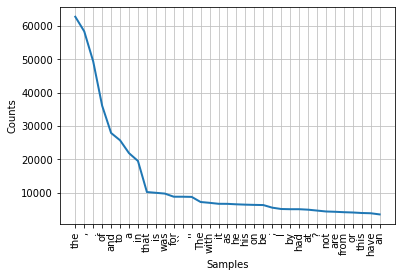

In [47]:
import matplotlib
fd.plot(35, cumulative=False);

### nltk.ConditionalFreqDist

-  berechnet Häufigkeitsverteilungen für Subsets, differenziert nach spezifischen Bedingungen (Conditional Frequency Lists)


Hier etwa differenziert nach Genre im Brown-Korpus:

In [48]:
from nltk import ConditionalFreqDist
import re

cfd_genre = ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) if (word.lower() not in stop and not re.match(r"[^\w]", word)))

In [49]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [50]:
cfd_genre['romance'].most_common(10)

[('said', 330),
 ('would', 244),
 ('could', 193),
 ('like', 185),
 ('one', 166),
 ('back', 126),
 ('thought', 105),
 ('little', 99),
 ('time', 93),
 ('get', 92)]

In [51]:
cfd_genre['government'].most_common(10)

[('year', 183),
 ('States', 162),
 ('United', 155),
 ('may', 153),
 ('would', 120),
 ('made', 118),
 ('development', 112),
 ('one', 111),
 ('1', 107),
 ('years', 106)]

## Konkordanzen und Kontexte

- wie bereits oben gesehen ermöglicht NLTK die Ausgabe von Konkordanzen
- Konkordanzen sind Trefferlisten mit Kontext (KWIC = Key Word in Context)
- Konkordanzen sind einen zentrale Methode in der Korpuslinguistik


- ebenso bietet NLTK Methoden an, um Wörter in ähnlichen Kontexten bzw. geteilte Kontexte zu finden


Im folgenden Beispiel wir das NLTK Book Example Corpus geladen und der erste Text (Moby Dick) für die Berechnungen verwendet: 

In [52]:
#Loading NLTK Book Example Corpus
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### nltk.concordance

In [53]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


### nltk.similar

- berechnet ähnliche Wörter (mit geteilten Kontexten):

In [54]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


### nltk.common_contexts

- berechnet geteilte Kontexte für Wörter:

In [55]:
text1.common_contexts(["monstrous", "true"])

the_pictures


## Kollokationen

- NLTK besitzt Methoden um häufig auftretende n-Gramme (Sequenzen benachbarter Wörter) zu finden
- am häufigsten werden Bigramme (Auftreten zweier Wörter) untersucht
- es gibt neben der simplen Häufigkeit des Auftretens verschiedene [Assoziationsmaße](https://www.nltk.org/howto/collocations.html#association-measures), die berechnen ob ein Bigramm häufiger als erwartet auftritt
  - z.B. **Pointwise Mutual Information**: https://medium.com/dataseries/understanding-pointwise-mutual-information-in-nlp-e4ef75ecb57a


https://www.nltk.org/howto/collocations.html



### nltk.bigrams

In [56]:
from nltk import bigrams
list(bigrams(['Call', 'me', 'Ishmael', '.']))

[('Call', 'me'), ('me', 'Ishmael'), ('Ishmael', '.')]

### nlkt.collocations

In [57]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


### nltk.collocations.BigramAssocMeasures

In [58]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

### nltk.BigramCollocationFinder

In [59]:
finder = BigramCollocationFinder.from_words(text1)

In [60]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

---
## &Uuml;bungsaufgaben 4


### Aufgabe 1 (Frequenzliste mit Python)
In der Vorlesung wurde die Frequenzliste mit der NLTK-Funktion `FreqDist()` sowie nativ mit Python berechnet. 

### 1a: Berechnen Sie für folgende Tokenliste die Frequenzliste als Python-Dictionary, indem Sie eine entsprechende Funktion definieren (Diese wird für die Tests in 1c benötigt; neben der Berechnung mit if/else gibt es weitere Varianten, etwa mit try/except oder dictionary comprehension)

### 1b: Verwenden Sie nun einen Counter der Collections-Library für die Frequenzlisten-Erstellung:
`collections import Counter`


In [61]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

### 1c: Führen Sie Efficiency Tests für die verschiedenen Berechnungsarten auf `wahlverwandschaften.txt` durch.  

- Verwenden Sie dafür die timeit-Library.
- Dazu muss die Frequenzlistberechnung als eine Funktion umgesetzt sein, die eine Tokenliste als Eingabeargument erwartet und eine Frequenzliste ausgibt.
- Übergeben Sie diese Funktion an den Timer (`countwords_def_test` im folgenden Beispielcode).

In [62]:
from nltk.tokenize import word_tokenize
raw_wahlverw = open('wahlverwandschaften.txt').read().lower()
wahlverw = word_tokenize(raw_wahlverw)
wahlverw[0:9]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe']

In [63]:
def countwords_def_test(text):
    counts = {t:0 for t in text}    
    return counts
print(countwords_def_test(wahlverw[0:9]))

{'die': 0, 'wahlverwandtschaften': 0, 'ein': 0, 'roman': 0, 'von': 0, 'johann': 0, 'wolfgang': 0, 'goethe': 0}


In [64]:
import timeit, functools
t = timeit.Timer(functools.partial(countwords_def_test, wahlverw))
print(t.timeit(5)) #number of executions

0.0030081669999990623


### Aufgabe 2 (Tokenisierung mit Python und NLTK)
Führen Sie auf `wahlverwandschaften.txt` verschiedene Varianten einer Tokenisierung durch. Verwenden Sie: 

- `split()`
- `re.findall()`
- `nltk.word_tokenize()`
- `nltk.regexp_tokenize()` (siehe https://www.nltk.org/book/ch03.html)


### Aufgabe 3 (gefilterte Frequenzliste mit NLTK)

Berechnen Sie  mit NLTK eine Stopwort-gefilterte Frequenzliste auf dem Brown-Korpus und plotten diese.

### Aufgabe 4 (Konkordanzen mit Python)

Berechnen Sie auf `wahlverwandschaften.txt` eine zeilenweise Konkordanz mit Python für den Suchterm 'geht'.

### Aufgabe 5 (Bigramme mit Python und NLTK)





#### 5a: Berechnen Sie auf `wahlverwandschaften.txt` eine Bigramm-Liste mit Python.

#### 5b: Testen Sie verschiedene NLTK-Bigramm-Assoziationsmaße und Frequency-Filter für einen Text ihrer Wahl:

In [65]:
#import nltk
from nltk.book import *

In [66]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [67]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

In [68]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.raw_freq, 10)

[(',', 'and'),
 ('of', 'the'),
 ("'", 's'),
 ('in', 'the'),
 (',', 'the'),
 (';', 'and'),
 ('to', 'the'),
 ('.', 'But'),
 (',', 'that'),
 ('.', '"')]